In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
%matplotlib inline

In [2]:
# A Spherical Proportional Counter ---
# Considering the spherical TPC discussed in the last lecture notes, but now operated as a proportional counter. Use Townsends approximation for α with A=12 and B=180 (conventional values for argon) to 
# Calculate the total gain of the system as a function of applied high voltage, for events originating at 
# the cathode. Make a plot of the dependence of gain upon high voltage for an outer sphere of radius 1m, 
# given an inner sphere of diameter 1cm and 5cm respectively. You will likely need to solve for the total 
# gain with a numerical integration in e.g. Python or Mathematica.




In [3]:
A=12
B=180
r1=100
r2=1/2
r3=5/2
p=200
Vo_r1=np.arange(5000,6000,2)
Vo_r3=np.arange(18000,21000,100)

values1={}
values2={}

Efield=lambda V0,r,r1,r2:(V0/(r**2))*((r1*r2)/(r1-r2))
TownSendCoef=lambda A,B,p,E:A*p*np.exp(-(B*p)/E)
Gain=lambda alphar:np.exp(alphar)

#Gain=lambda alpha,r1,r2:np.exp(alpha*(1))

def integrand(r,rlow,rhigh,V0,A,B,p):
    
    #E=(V0/(r**2))*((rlow*rhigh)/(rhigh-rlow))
    E=Efield(V0,r,rhigh,rlow)
    G=A*p*np.exp(-(B*p)/E)
    #T=TownSendCoef(A,B,p,E)
    return G

for v in Vo_r1:
    I1=quad(integrand,r2,r1,args=(r2,r1,v,A,B,p))[0]
    
    values1[v]=Gain(I1)
    
for v in Vo_r3:
    I2=quad(integrand,r3,r1,args=(r3,r1,v,A,B,p))[0]
    values2[v]=Gain(I2)

# for inner radius 0.1 m
Voltages1=np.array(list(values1.keys()))
Gain1=np.array(list(values1.values()))

#for inner radius 0.5m
Voltages2=np.array(list(values2.keys()))
Gain2=np.array(list(values2.values()))


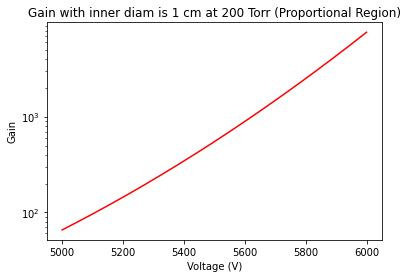

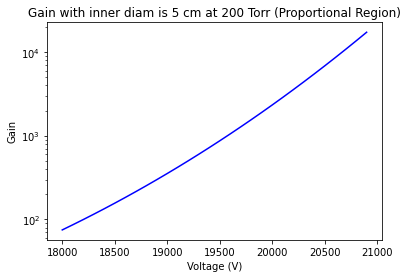

In [4]:
plt.plot(Voltages1,Gain1,color='r')
plt.title("Gain with inner diam is 1 cm at 200 Torr (Proportional Region)")
plt.xlabel("Voltage (V)")
plt.ylabel("Gain")
plt.semilogy()
plt.show()

plt.plot(Voltages2,Gain2,color='b')
plt.title("Gain with inner diam is 5 cm at 200 Torr (Proportional Region)")
plt.xlabel("Voltage (V)")
plt.ylabel("Gain")
plt.semilogy()
plt.show()

In [5]:
# Lecture 18 Problem
# Consider a GEM foil of thickness 50 micrometers biased at V operated in Blargon at 1 atm of pressure. 
# Blargon has a W-Value for photon production of 20 eV, and Townsend A and B parameneters of 
# A=11/(cm*torr), B=160V/(cm*Torr).

# a) At what applied voltage will the gain mechanism transition from electroluminiscent to avalanche mode? 
#    (you canq consider that it is operating in avalanche mode when at the expected rate of secondary 
#    electron production is at least one electron per gap distance, or charge gain G~2)

# b) Show that at about twice the avalanche threshold voltage, the charge gain is approximately G~350

# c) Just below the avalanche threshold voltage, use an argument of energy conservation to explain 
#    why the electroluminiscient gain (to photons) should be around G~8

In [6]:

TownSendCoefGEM=lambda A,B,p,E:A*p*np.exp(-(B*p)/E)
GainGEM=lambda alpha,d:np.exp(alpha*d)

In [7]:
BlA=11          #1/(cm*Torr)
BlB=160         #V/cm*Torr
d=50e-4         #cm
pressure=760    # 1 atm to Tor
V=np.arange(1,500,0.1)

#for GEM
values3={}
count=0
for i in V:
    E=i/d
    Gain=GainGEM(TownSendCoefGEM(BlA,BlB,pressure,E),d)
    values3[i]=Gain
    count+=1
    if ((round(i,2)>154.6 and round(i,2)<154.8) or (round(i,1)>309.3 and round(i,1)<309.5) ):
        print (f" Voltages -> {round(i,2)} , Gain->{round(Gain,3)}")
        #print(count)

 Voltages -> 154.7 , Gain->2.273
 Voltages -> 309.4 , Gain->350.012


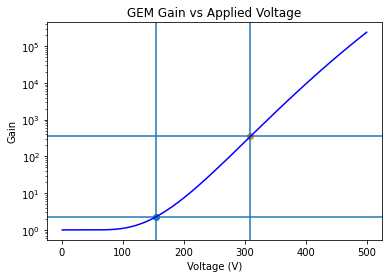

In [8]:
Voltages3=np.array(list(values3.keys()))
Gain3=np.array(list(values3.values()))
plt.axvline(x=154.7)
plt.axhline(y=2.27)

plt.axvline(x=309.4)
plt.axhline(y=350)


plt.scatter(154.7,2.27)
plt.scatter(309.4,350)
plt.plot(Voltages3,Gain3,color='b')
plt.title("GEM Gain vs Applied Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Gain")
plt.yscale("log")
plt.show()

In [9]:
############ For the problem of Dr Nygren #####################

In [10]:
dsi=5e22  #atoms/cm^3
BcmK=7.3e15 #cm^-3*K^-(3/2) for Silicon
kboltz=8.62e-5 #evK^-1
Eg=1.12 #eV
Temperature =np.arange(40,500,1)
ni= lambda T:BcmK*T**(3/2)*np.exp(-Eg/(2*kboltz*T))
Fraction=[]

for t in Temperature:
    Fraction.append(ni(t))
    if(t==50 or t==300):
        print(f" For Temp --> {t} K")
        print(f" ni --> {ni(t)} cm^-3 ")
        print(f" ni/dsi --> {ni(t)/dsi} atoms ^-1\n")

 For Temp --> 50 K
 ni --> 9.632178750908393e-39 cm^-3 
 ni/dsi --> 1.9264357501816788e-61 atoms ^-1

 For Temp --> 300 K
 ni --> 14939263473.254656 cm^-3 
 ni/dsi --> 2.987852694650931e-13 atoms ^-1



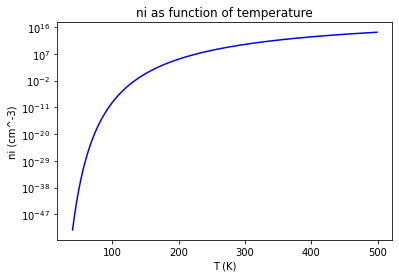

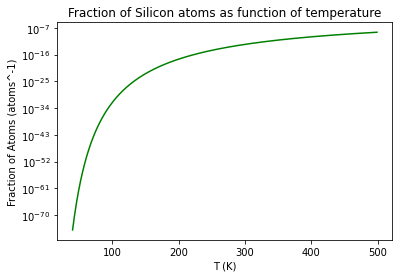

In [11]:
Fraction=np.array(Fraction)
plt.plot(Temperature,Fraction,color='b')
plt.title("ni as function of temperature")
plt.ylabel("ni (cm^-3)")
plt.xlabel("T (K)")
plt.yscale("log")
plt.show()

fracdsi=Fraction/dsi
plt.plot(Temperature,fracdsi,color='g')
plt.title("Fraction of Silicon atoms as function of temperature")
plt.ylabel("Fraction of Atoms (atoms^-1)")
plt.xlabel("T (K)")
plt.yscale("log")
plt.show()

In [12]:
### For the Last Homework Problem

#Plot the power radiated into a cavity of volume 1m2 for an axion coupling
#gaγγ ∼10−15 by an axion on resonance as a function if its mass. Assume Cnlm = 1 and 
#use the parameters of the ADMX experiment: Q ∼ 500,000 and B=8T.

In [13]:
B=8 # Tesla
Cnlm=1
Q=5e5
gayy=1e-15
V=1 #m^2
h=4.135667696e-15 # eV⋅Hz−1
pdark=0.3
PowerVal={}

Power=lambda Ma:(1.9e-22)*(V/136)*((B/6.8)**2)*((gayy/0.97)**2)*(pdark/0.45)*(Ma/(h*(650e6)))*(Cnlm/0.4)*(Q/50000)
Axion_Mass_Range=np.arange(1e-13,1e-2,1e-7)

for Mass in Axion_Mass_Range:
    PowerVal[Mass]=Power(Mass)
    

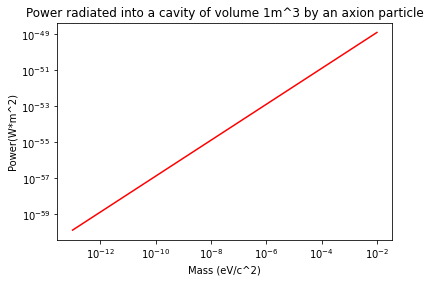

In [14]:
Powers=np.array(list(PowerVal.values()))
Masses=np.array(list(PowerVal.keys()))
plt.plot(Masses,Powers,color='r')
plt.title("Power radiated into a cavity of volume 1m^3 by an axion particle")
plt.xlabel("Mass (eV/c^2)")
plt.ylabel("Power(W*m^2)")
plt.yscale("log")
plt.xscale("log")
plt.show()

In [15]:
######################  Dark Matter Problem #######################################

In [103]:
vmin=np.arange(0,700,1)
tAngle=60
N0=0.3 #cm^-3*Mx^-1
sigma=np.sqrt(3/2)*2.2e7 #cm
VE=lambda y:(222 +15*np.sin(2*np.pi*y))*100000 #km/s
Vescp=5.54e7

fv=lambda vpp:(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(vpp**2)/(2*sigma**2))
fv2=lambda vpp:(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(vpp**2)/(2*sigma**2))


def VelocityDist(vel,year):
    vvv= VE(year)
    result=2*np.pi*(vel**2)*np.exp(-(((vel)**2+vvv**2)/(2*sigma**2)+((vel*vvv)*np.cos(tAngle)))/(sigma**2))
    value=result/(np.sqrt(2*np.pi)*sigma)
    return value


Decvalues=[]
Junevalues=[]
SpeedDistJune=[]
SpeedDistDec=[]
for kk in vmin:
    #for Dec y=0.75 and Jan y=0.25
    kkcm=kk*100000
    yr=0.75
    Decvalues.append(0.3*quad(VelocityDist,kkcm,Vescp,args=(yr))[0])
    SpeedDistDec.append(fv2(kkcm-VE(yr)))
    yr=0.25
    SpeedDistJune.append(fv2(kkcm-VE(yr)))
    Junevalues.append(0.3*quad(VelocityDist,kkcm,Vescp,args=(yr))[0])
    

Decvalues=np.array(Decvalues)
Junevalues=np.array(Junevalues)

    
    
    
    

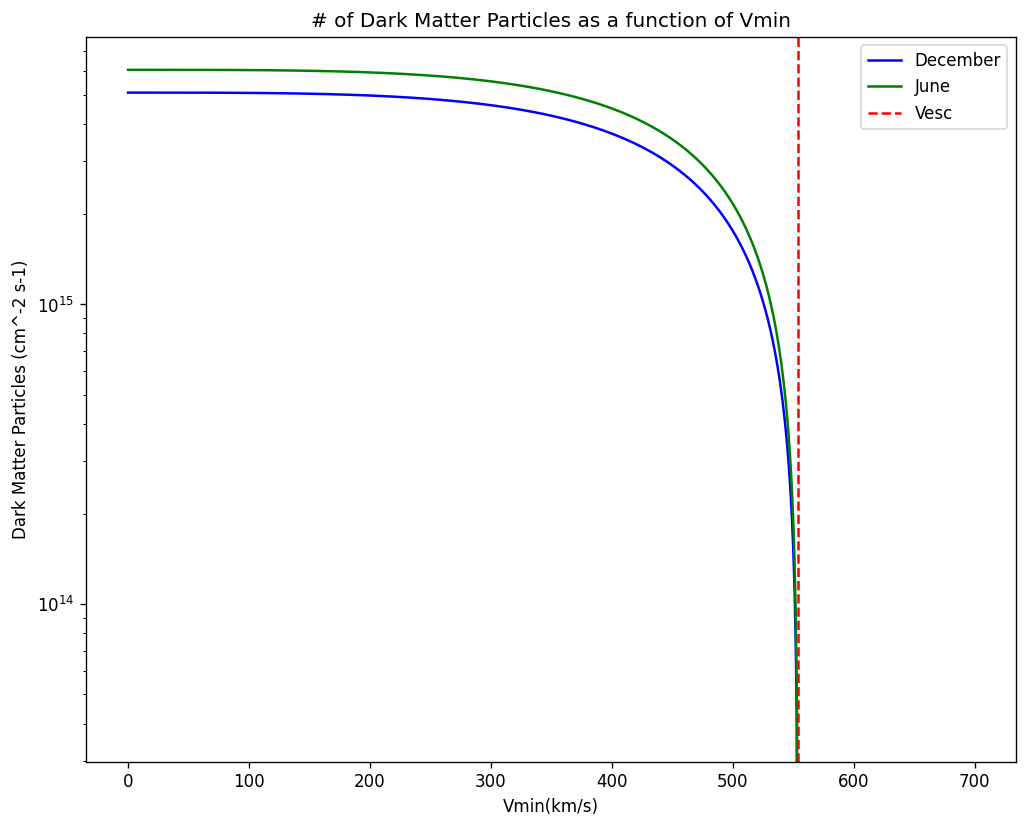

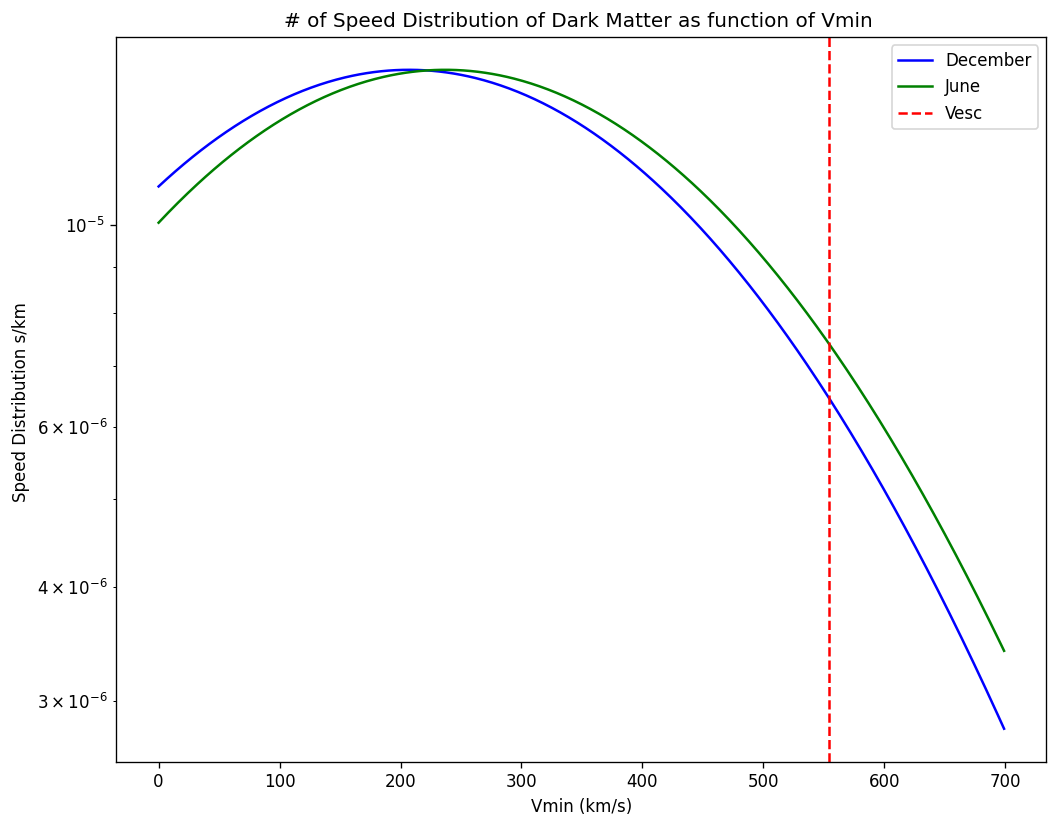

In [104]:
plt.figure(figsize=(10, 8), dpi=120)
plt.title("# of Dark Matter Particles as a function of Vmin")
plt.xlabel("Vmin(km/s)")
plt.ylabel("Dark Matter Particles (cm^-2 s-1)")
plt.plot(vmin,Decvalues,color="b",label="December")
plt.plot(vmin,Junevalues,color="g",label="June")
plt.axvline(x=554,color="r",ls="--",label="Vesc")

plt.semilogy()
plt.legend()
plt.show()

plt.figure(figsize=(10, 8), dpi=120)
plt.title("# of Speed Distribution of Dark Matter as function of Vmin ")
plt.ylabel("Speed Distribution s/km ")
plt.xlabel("Vmin (km/s)")
plt.plot(vmin,SpeedDistDec,color="b",label="December")
plt.plot(vmin,SpeedDistJune,color="g",label="June")
plt.axvline(x=554,color="r",ls="--",label="Vesc")

plt.semilogy()
plt.legend()
plt.show()